In [1]:
import numpy as np
import pandas as pd
import openturns as ot
from matplotlib import cm
from matplotlib import pyplot as plt
from bancs import BANCS, DrawFunctions

## Parabolic 2 reliability problem

In [2]:
g = ot.SymbolicFunction(["x1", "x2"], ["(x1 - x2) ^ 2 - 8 * (x1 + x2 - 5)"])
X = ot.ComposedDistribution([ot.Normal(0., 1.)] * 2)
Y = ot.CompositeRandomVector(g, ot.RandomVector(X))
threshold = 0.
failure_event = ot.ThresholdEvent(Y, ot.LessOrEqual(), threshold)
# Reference computed using CMC with subset size N=1e7
pf_ref = 0.0001315399999999369

In [5]:
N = int(1e4)
bancs = BANCS(failure_event, N=N, M="AMISE", p0=0.1)
quantiles = bancs.run()
pf = bancs.compute_pf()
print("Quantiles =", quantiles)
print("Proba EBC = {:.2e}".format(pf))
print("Relative error = {:.2%}".format(np.abs(pf - pf_ref) / pf_ref))

AMISE : 10
AMISE : 13
AMISE : 13
Quantiles = [27.30776738 14.75383859  5.23990513 -2.76838163]
Proba EBC = 1.33e-04
Relative error = 0.99%


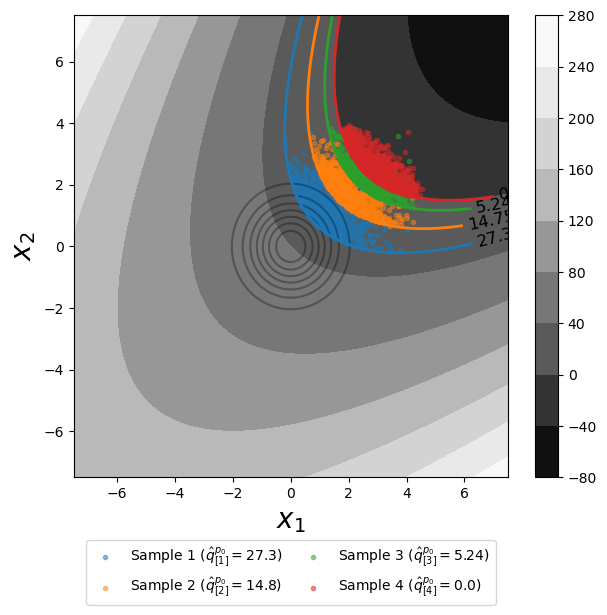

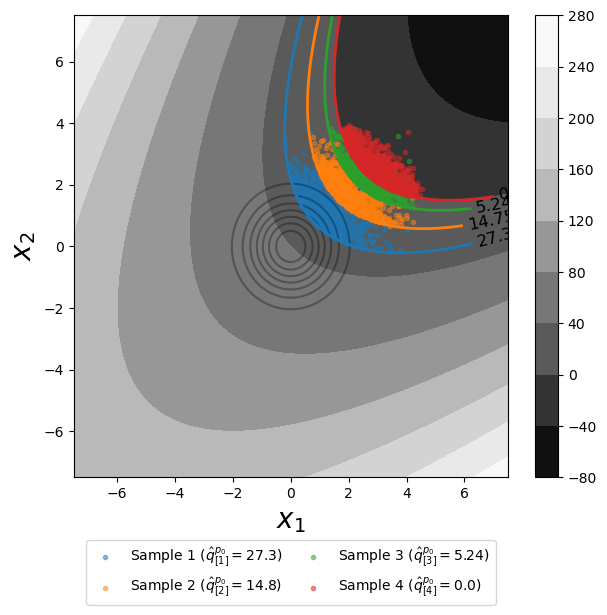

In [6]:
bancs.draw_2D_BANCS("")